# Principal Component Analysis

The PCA algorithm as described in the README.md file reduces the number of variables in a dataset while maintaining as much of the variance in the data as possible. I will be taking most features of the transportation and socioeconomic data from the data file we have been working with and determine the 3 features that maintain the most variance. For this implementation, I will be using the PCA algorithm in scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read csv file with all country transit and socioeconomic data
df = pd.read_csv("Data/CountryData1.csv")

In [3]:
# clean up data file

# Number of original dimensions: 27
# Goal dimensions to reduce to: 3 

row_ind = list(range(0, 21)) + [22, 23, 26, 27, 28]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

fil_df = df.loc[row_ind, col_filled] # create new data table with isolated rows
fil_df.head()

,Unnamed: 0,Time,Time Code,Indicator Name,Indicator Code,Albania [ALB],Armenia [ARM],Austria [AUT],Belgium [BEL],Bosnia and Herzegovina [BIH],...,Poland [POL],Portugal [PRT],Romania [ROU],Russian Federation [RUS],Serbia [SRB],Spain [ESP],Switzerland [CHE],Tunisia [TUN],Turkey [TUR],United Kingdom [GBR]
0,0,2013,YR2013,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,0,1,326,1561,0,...,98,319,5,4249,1,958,1444,15,2296,6032
1,1,2013,YR2013,"Air transport, passengers carried",IS.AIR.PSGR,865848,45000,15037454,9521421,15000,...,5002976,11860998,3087143,64072322,1241352,48056736,27503416,4648608,74413805,118605866
2,2,2013,YR2013,CO2 emission from transport (of which road) re...,CO.EM.TRNS.ROAD.PPP,0.08,0.058,0.059,0.052,0.076,...,0.048,0.055,0.038,0.043,0.054,0.051,0.038,0.048,0.037,0.045
3,3,2013,YR2013,CO2 emission from transport relative to GDP (P...,CO.EM.TRNS.GDP.PPP,0.087,0.058,0.061,0.054,0.076,...,0.049,0.058,0.04,0.07,0.061,0.056,0.038,0.052,0.04,0.048
4,4,2013,YR2013,Deaths by road user category - 2 or 3 wheeler [%],ROAD.DTH.2.WEEL,13.2,0,21.5,15.9,9.1,...,9.4,20.4,4.7,4.3,8.6,21.1,20.4,20.5,4.3,19.3


In [4]:
# transform data file and delete time/labels for correlations
df_transposed = fil_df.T
df_transposed.columns = df_transposed.iloc[3]
df_pca = df_transposed.iloc[5:,:]
df_pca = df_pca.astype(float)
df_pca.head()

Indicator Name,"Air transport, freight (million ton-km)","Air transport, passengers carried",CO2 emission from transport (of which road) relative to GDP (PPP) (kg per dollar),CO2 emission from transport relative to GDP (PPP) (kg per dollar),Deaths by road user category - 2 or 3 wheeler [%],Deaths by road user category - 4 wheeler [%],Deaths by road user category - cyclist [%],Deaths by road user category - others [%],Deaths by road user category - pedestrian [%],"Mortality caused by road traffic injury (per 100,000 people)",...,Quality of railroad infrastructure [value: 1 = worst to 7 = best],Quality of roads [rank],Quality of roads [value: 1 = worst to 7 = best],"Railways, passengers carried (million passenger-km)",Total world transport-related GHG emissions (million tonnes),GDP per capita (current US$),Population in the largest city (% of urban population),Fossil fuel energy consumption (% of total),Population density (people per sq. km of land area),Individuals using the Internet (% of population)
Albania [ALB],0.0,865848.0,0.080,0.087,13.2,50.8,4.1,0.7,31.2,15.0,...,1.18,76.0,3.85,32.0,2.5,4413.063383,26.977777,56.53,105.660292,51.8
Armenia [ARM],1.0,45000.0,0.058,0.058,0.0,54.7,0.3,9.2,35.8,18.0,...,2.60,82.0,3.68,50.0,1.3,3680.166922,55.807632,75.51,106.146821,41.9
Austria [AUT],326.0,15037454.0,0.059,0.061,21.5,42.4,11.2,5.9,18.0,5.0,...,5.22,6.0,6.22,10749.0,22.8,50305.354580,36.867921,66.10,102.760822,80.6
Belgium [BEL],1561.0,9521421.0,0.052,0.054,15.9,51.9,10.1,8.4,13.7,7.0,...,4.96,26.0,5.39,10848.0,24.3,46964.594680,18.067526,70.58,367.896581,82.2
Bosnia and Herzegovina [BIH],0.0,15000.0,0.076,0.076,9.1,52.6,11.0,0.0,27.3,18.0,...,3.04,104.0,3.05,47.0,2.8,5034.566160,20.374464,92.50,70.524590,48.5


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

In [7]:
# initialize pca and fit
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.components_)

[[ 0.16763572  0.13955781 -0.16263137 -0.17733931  0.14881608 -0.11254585
   0.13376232  0.0359094  -0.15694557 -0.18507758 -0.07924243 -0.26928913
   0.2671493  -0.27953745  0.28083151 -0.2691611   0.27611501 -0.26603765
   0.26842539  0.06430243  0.09887804  0.24271157 -0.14323509 -0.05540474
   0.17337644  0.23767582]
 [ 0.2679509   0.32529952 -0.11361324 -0.09645875  0.14088915 -0.29960038
  -0.0385591   0.25690817 -0.02030057  0.17692617  0.31634819  0.07441371
  -0.08129237  0.07501617 -0.07716445 -0.02122017 -0.00048026  0.09694738
  -0.10549975  0.39388836  0.37301018 -0.17235041 -0.16700265  0.18596608
   0.11643698 -0.21576165]]


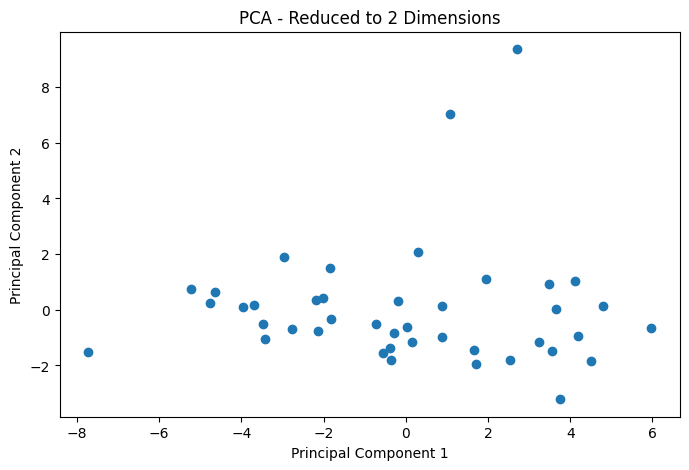

In [8]:
# visualize 2 dimensions
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA - Reduced to 2 Dimensions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [9]:
# explained variance for each PC
print("Explained Variance Ratio (PC1, PC2):", pca.explained_variance_ratio_)
print("Total Explained Variance:", np.sum(pca.explained_variance_ratio_))

Explained Variance Ratio (PC1, PC2): [0.38880856 0.17894824]
Total Explained Variance: 0.5677568073331701


### Analyze DBSCAN clustering before and after

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

### Before PCA

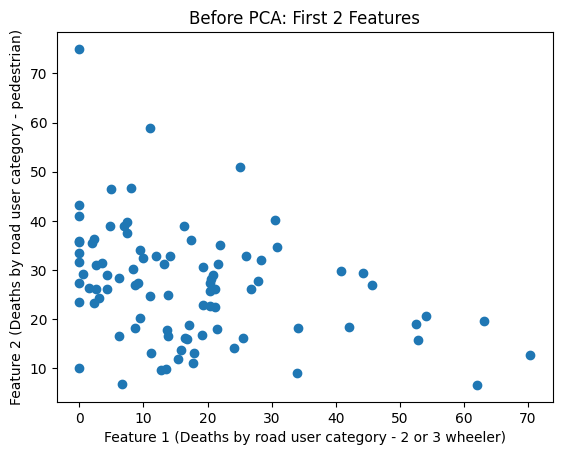

In [44]:
# isolate the following features: pick two columns

row_ind = [4, 8]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

df_before = df.loc[row_ind, col_filled] # create new data table with isolated rows
# transform data file and delete time/labels for correlations
df_transposed = df_before.T
df_transposed.columns = df_transposed.iloc[3]
df_nopca = df_transposed.iloc[5:,:]
df_nopca = df_nopca.astype(float)

# graph relationship
plt.figure()
plt.scatter(df_nopca.iloc[:, 0], df_nopca.iloc[:, 1])
plt.title('Before PCA: First 2 Features')
plt.xlabel('Feature 1 (Deaths by road user category - 2 or 3 wheeler)')
plt.ylabel('Feature 2 (Deaths by road user category - pedestrian)')
plt.show()

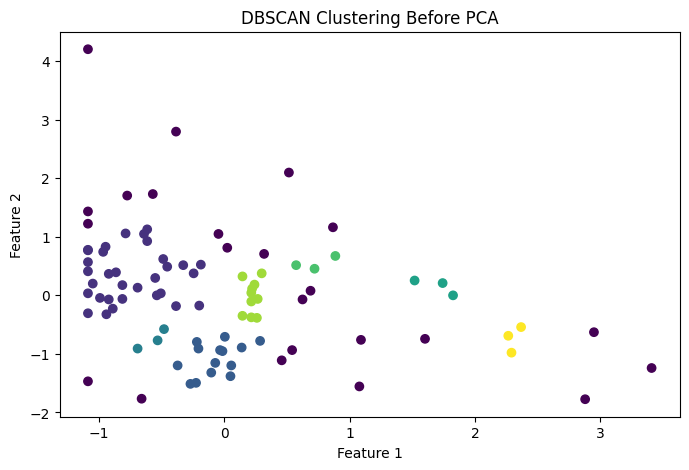

Estimated number of clusters: 7
Number of noise points: 23


In [42]:
# scale data
scaler_nopca = StandardScaler()
X_scaled_nopca = scaler.fit_transform(df_nopca)

# apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
labels = dbscan.fit_predict(X_scaled_nopca)

# graph cluster
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled_nopca[:, 0], X_scaled_nopca[:, 1], c=labels)
plt.title(f"DBSCAN Clustering Before PCA")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# print number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

### After PCA

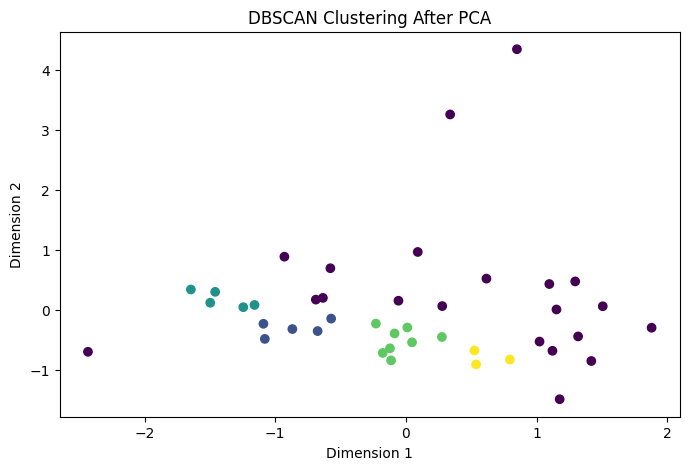

Estimated number of clusters: 4
Number of noise points: 21


In [43]:
# scale data
scaler_pca = StandardScaler()
X_scaled_pca = scaler.fit_transform(X_pca)

# apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
labels = dbscan.fit_predict(X_scaled_pca)

# graph cluster
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=labels)
plt.title(f"DBSCAN Clustering After PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# print number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

### Conclusion

PCA is particularly valuable for visualization, noise reduction, and preprocessing for clustering or classification tasks. With the above data set, there are less points overall after PCA and seemingly less spread out points. However, the components that are outputed from PCA may not always align with any patterns for a specific predictive goal. As demonstrated in the comparison of DBSCAN, reducing dimensions can sometimes lead to the loss certains structures. Often with large data sets like those containing socioeconomic data, it is useful to determine the 2 or 3 more important dimensions so that data analysis is mangeable.